In [1]:
# Standard scientific Python imports
%matplotlib inline
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

In [2]:
# The digits dataset for training
digits = datasets.load_digits()

# The data is made of 8x8 images of digits
# zip the image and label (dependent variable) together
images_and_labels = list(zip(digits.images, digits.target))

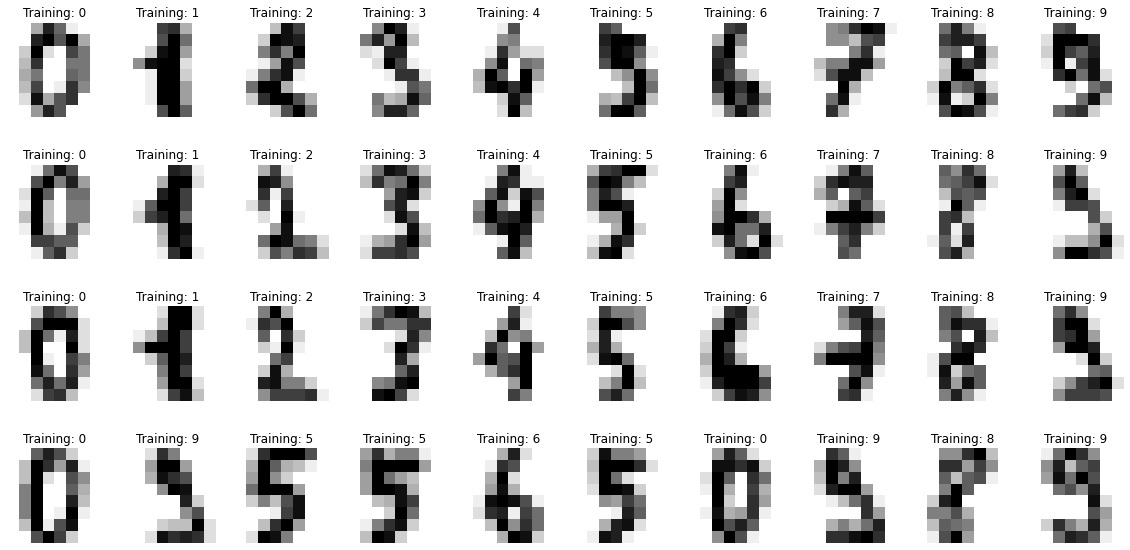

In [3]:
# Draw the first 40 data points - in this case images
plt.figure(1, figsize=(20, 10))
for index, (image, label) in enumerate(images_and_labels[:40]):
    plt.subplot(4, 10, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Training: {label}')

In [12]:
# To apply a classifier on this data, we need to flatten the image
# Turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(f'N={len(data)}, M={len(data[0])}')

N=1797, M=64


In [13]:
# Create a classifier: a support vector classifier
# gamma is normally determined using a hyperparameter search which would need a validation dataset
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits - 50% data is used as the training set
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

In [14]:
print(f'Classification report for classifier {classifier}:\n{metrics.accuracy_score(expected, predicted)}\n')

Classification report for classifier SVC(gamma=0.001):
0.9688542825361512



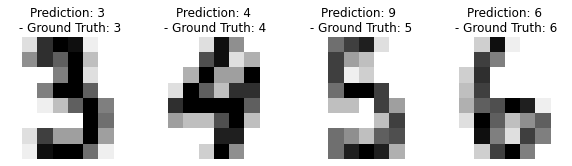

In [15]:
# Change the indices in images_and_predictions below to see more predictions
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
plt.figure(1, figsize=(10, 10))
for index, (image, prediction) in enumerate(images_and_predictions[30:34]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Prediction: {prediction}\n - Ground Truth: {expected[index+30]}')
#
plt.show()

In [21]:
print(f"Label of 100: {images_and_labels[100][1]}")
print(f"Label of 101: {images_and_labels[101][1]}")

Label of 100: 4
Label of 101: 0
